In [288]:
import pandas as pd
import numpy as np
import progressbar
import matplotlib.pyplot as plt
from IMPORT_DATAFRAME_JSON_HDF5 import *
%matplotlib notebook
import os

In [289]:
date = '2017-08-07'
transients = import_trasient_from_file("jsons/")

100% (21 of 21) |#########################| Elapsed Time: 0:00:01 Time: 0:00:01


In [290]:
#Reading the HDF datafiles for each phase and date
Phase_1 = pd.read_hdf('HDF5/phase_1_' + date + '.h5', usecols=['P'])
Phase_2 = pd.read_hdf('HDF5/phase_2_' + date + '.h5', usecols=['P'])
Phase_3 = pd.read_hdf('HDF5/phase_3_' + date + '.h5', usecols=['P'])



In [291]:
#Decreasing the temporal resolution from 5Hz to temp_res [minutes] in a new df
temp_res = 1
mean_interval = 300 * temp_res
Phase_1.index//2
Phase_2.index//2
Phase_3.index//2
Phase_1_averaged = Phase_1.groupby(np.arange(len(Phase_1))//mean_interval).mean()
Phase_2_averaged = Phase_2.groupby(np.arange(len(Phase_2))//mean_interval).mean()
Phase_3_averaged = Phase_3.groupby(np.arange(len(Phase_3))//mean_interval).mean()
len(Phase_1_averaged)

1441

In [292]:
#Calculating P_delta
Phase_1_averaged['P_delta'] = Phase_1_averaged['P'].diff()
Phase_2_averaged['P_delta'] = Phase_2_averaged['P'].diff()
Phase_3_averaged['P_delta'] = Phase_3_averaged['P'].diff()
Phase_3_averaged.head()


,N,P,PF,S,freq,rms_i,rms_u,thd_i,thd_u,timestamp,P_delta
0,345.469147,132.933426,0.359123,370.162720,49.944237,1.533825,241.333099,46.043358,1.445538,1.502057e+09,NaN
1,345.351013,132.910782,0.359177,370.044373,49.936264,1.533835,241.254456,46.322517,1.473088,1.502057e+09,-0.022644
2,345.785492,132.939194,0.358850,370.460052,49.949211,1.534780,241.376846,46.266689,1.443483,1.502057e+09,0.028412
3,345.185791,132.933273,0.359379,369.898163,49.954491,1.532269,241.405472,45.771046,1.453196,1.502057e+09,-0.005920
4,345.712311,132.951065,0.358944,370.395996,49.958626,1.533960,241.464005,45.962284,1.455663,1.502057e+09,0.017792


In [293]:
Phase_1_averaged['timestamp_string'] = Phase_1_averaged['timestamp']
Phase_1_averaged['timestamp_string'] =  pd.to_datetime(Phase_1_averaged['timestamp_string'], unit = 's')
Phase_2_averaged['timestamp_string'] = Phase_2_averaged['timestamp']
Phase_2_averaged['timestamp_string'] =  pd.to_datetime(Phase_2_averaged['timestamp_string'], unit = 's')
Phase_3_averaged['timestamp_string'] = Phase_3_averaged['timestamp']
Phase_3_averaged['timestamp_string'] =  pd.to_datetime(Phase_3_averaged['timestamp_string'], unit = 's')
Phase_3_averaged

,N,P,PF,S,freq,rms_i,rms_u,thd_i,thd_u,timestamp,P_delta,timestamp_string
0,345.469147,132.933426,0.359123,370.162720,49.944237,1.533825,241.333099,46.043358,1.445538,1.502057e+09,NaN,2017-08-06 22:00:29.976790
1,345.351013,132.910782,0.359177,370.044373,49.936264,1.533835,241.254456,46.322517,1.473088,1.502057e+09,-0.022644,2017-08-06 22:01:30.048912
2,345.785492,132.939194,0.358850,370.460052,49.949211,1.534780,241.376846,46.266689,1.443483,1.502057e+09,0.028412,2017-08-06 22:02:30.119594
3,345.185791,132.933273,0.359379,369.898163,49.954491,1.532269,241.405472,45.771046,1.453196,1.502057e+09,-0.005920,2017-08-06 22:03:30.176321
4,345.712311,132.951065,0.358944,370.395996,49.958626,1.533960,241.464005,45.962284,1.455663,1.502057e+09,0.017792,2017-08-06 22:04:30.228715
5,345.509003,132.975082,0.359184,370.214844,49.966969,1.532438,241.585663,45.770580,1.436075,1.502057e+09,0.024017,2017-08-06 22:05:30.275358
6,345.538086,132.965485,0.359136,370.238586,49.962898,1.533138,241.490829,46.019127,1.457940,1.502057e+09,-0.009598,2017-08-06 22:06:30.317554
7,345.104401,132.971237,0.359542,369.835846,49.973991,1.531621,241.467010,45.661823,1.449638,1.502057e+09,0.005753,2017-08-06 22:07:30.357059
8,345.272369,132.945786,0.359330,369.983490,49.977188,1.532197,241.472626,45.872009,1.442037,1.502057e+09,-0.025452,2017-08-06 22:08:30.385621
9,345.814484,132.972870,0.358903,370.499146,49.987816,1.533814,241.554138,46.129902,1.434463,1.502057e+09,0.027084,2017-08-06 22:09:30.407354


In [294]:
transients_3 = transients.loc[transients['phase_num'] == 3]
transients_3

,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient
begin_timestamp_float,,,,,,,,,
1.502078e+09,9566,07-08-2017_05:57:55_372503,"[0.0509015881, 0.0373594649, -0.2846501172, -0...",3,"[0.8697509766, 0.8850097656, 0.9002685547, 0.9...","[-296.6898498535, -296.6764221191, -296.461700...","[62.907, 18.293, 11.532]","[9579, 9593, 9643]",-2.386365e+06
1.502078e+09,258,07-08-2017_05:57:55_373871,"[0.4357594913, 0.4344563004, 0.4490676893, 0.3...",3,"[0.9613037109, 0.9307861328, 0.9307861328, 0.9...","[-296.9448547363, -296.8240661621, -296.689849...","[33.856, 17.374, 11.446]","[272, 288, 748]",-1.183857e+06
1.502080e+09,5647,07-08-2017_06:31:01_239940,"[0.1690200435, 0.1297321745, -0.00529501100000...",3,"[15.380859375, 15.4113769531, 15.3350830078, 1...","[293.2407531738, 293.0931091309, 292.972351074...","[38.315, 11.036, 2.046]","[5654, 6330, 9549]",2.689625e+06
1.502088e+09,7236,07-08-2017_08:34:04_257314,"[0.11544220890000001, 0.2509273291, 0.15575514...",3,"[-15.380859375, -15.3961181641, -15.3961181641...","[-292.0194702148, -291.9523620605, -291.831573...","[28.307, 8.383, 21.658]","[7244, 7266, 7854]",1.709387e+06
1.502088e+09,7303,07-08-2017_08:35:55_543191,"[0.16103476800000002, 0.0671016554, -0.0134342...",3,"[-15.5944824219, -15.563964843800001, -15.5639...","[-291.4423828125, -291.2008056641, -290.999511...","[28.103, 7.609, 5.449]","[7312, 7333, 7402]",1.547846e+06
1.502091e+09,4584,07-08-2017_09:29:36_646883,"[-0.1900543272, -0.2842275798, -0.190001294000...",3,"[-15.8233642578, -15.8233642578, -15.838623046...","[-291.1471252441, -290.9995117188, -290.932403...","[78.721, 21.497, 37.798]","[4594, 4616, 5384]",3.894844e+06
1.502100e+09,6138,07-08-2017_12:01:44_039195,"[-0.1400129497, -0.19375287, -0.1532995254, -0...",3,"[1.0528564453, 1.0833740234, 1.0833740234, 1.1...","[-297.5085144043, -297.3608703613, -297.240112...","[24.685, 20.783, 14.976]","[6147, 6163, 6736]",-1.418383e+06
1.502106e+09,5603,07-08-2017_13:43:33_865098,"[-0.1164327933, 0.08589934540000001, 0.0448971...",3,"[-0.9765625, -0.9765625, -0.9460449219, -1.022...","[296.877746582, 296.7032775879, 296.5288085938...","[36.792, 15.375, 10.924]","[5617, 5630, 5650]",-1.298789e+06
1.502108e+09,4530,07-08-2017_14:17:44_464357,"[0.38919329010000003, 0.5099818687000001, 0.46...",3,"[-15.0604248047, -14.9993896484, -15.029907226...","[-297.6695556641, -297.6024475098, -297.401153...","[61.453, 17.662, 30.519]","[4539, 4573, 5415]",3.309675e+06


<IPython.core.display.Javascript object>


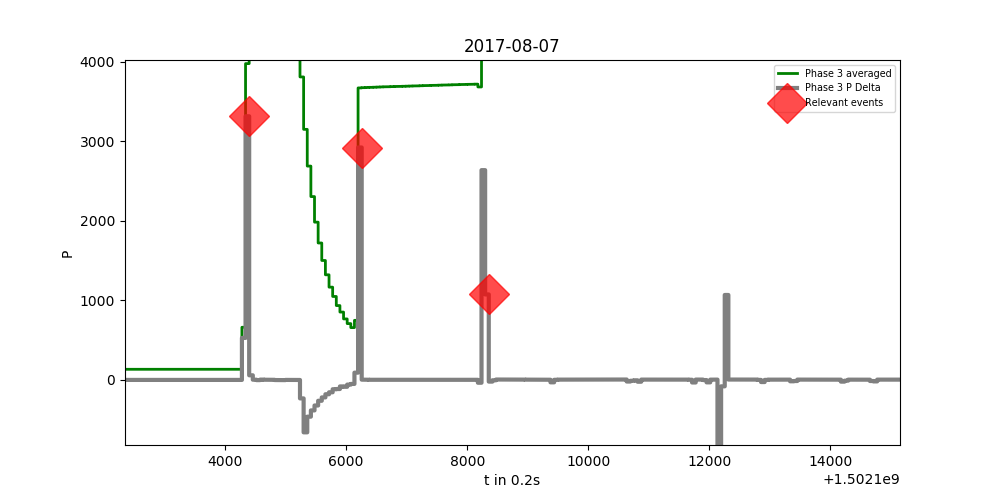

In [306]:
plt.figure(figsize=(10,5))
#plt.step(Phase_3['timestamp'],Phase_3['P'], color="blue", linewidth=2, label='Phase 3 full resolution')
plt.step(Phase_3_averaged['timestamp'],Phase_3_averaged['P'], '--',color="green", linewidth=2, label='Phase 3 averaged')
plt.step(Phase_3_averaged['timestamp'],Phase_3_averaged['P_delta'], color="grey", linewidth=3, label='Phase 3 P Delta')
#plt.plot(transients_3.index, transients_3['phase_num'], "X",color="green", markersize=20,alpha=.7, label='Transient_Phase_3')
plt.plot(Relevant_events_filtered['timestamp'], Relevant_events_filtered['P_delta'], "D", color="red", markersize=20,alpha=.7, label='Relevant events')
plt.legend(loc='upper right', frameon=True, fontsize = 'x-small')
plt.title( date)
plt.ylabel('P')
plt.xlabel('t in 0.2s')

<IPython.core.display.Javascript object>


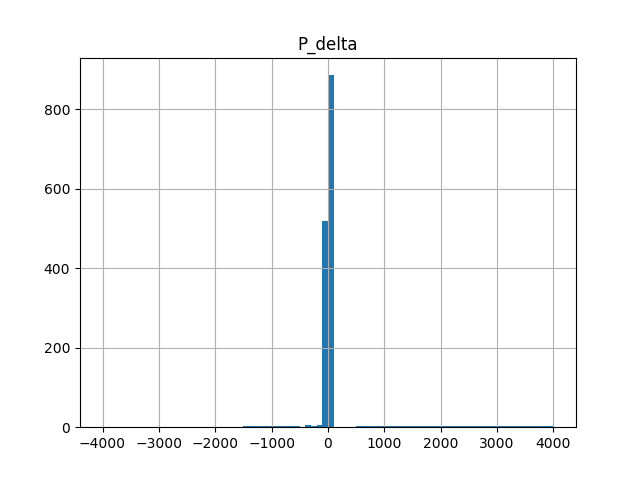

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002173CC18>]], dtype=object)

In [296]:
Phase_3_averaged.hist(column='P_delta',bins=[-4000, -3000, -2000, -1500 ,-1000, -500, -400, -300, -200, -100 ,0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000])


In [297]:
#Filtering all relevant events in order to identify plugin and unplug events
#Step 1. Filtering all relevant P_deltas from the low resolution df

Relevant_events_1 = Phase_1_averaged.loc[(Phase_1_averaged['P_delta'] > 1000)]
Relevant_events_2 = Phase_2_averaged.loc[(Phase_2_averaged['P_delta'] > 1000)]
Relevant_events_3 = Phase_3_averaged.loc[(Phase_3_averaged['P_delta'] > 1000)]

In [298]:
#Step 2 check if event is real switch-on or hardware/measerument error


Relevant_events_filtered = Relevant_events_3[['timestamp','P', 'P_delta']]

for row in range(0,len(Relevant_events_filtered)):
    timestamp_event = Relevant_events_3.iloc[row]['timestamp']
    new_average_power = Phase_3.loc[(Phase_3['timestamp'] >= timestamp_event+60-10) & (Phase_3['timestamp'] <= timestamp_event+60+10) ]['P'].sum()/len(Phase_3.loc[(Phase_3['timestamp'] >= timestamp_event+60-10) & (Phase_3['timestamp'] <= timestamp_event+60+10) ]['P'].values)
    old_average_power = Phase_3.loc[(Phase_3['timestamp'] >= timestamp_event+-300-10) & (Phase_3['timestamp'] <= timestamp_event-300+10) ]['P'].sum()/len(Phase_3.loc[(Phase_3['timestamp'] >= timestamp_event+-300-10) & (Phase_3['timestamp'] <= timestamp_event-300+10) ]['P'].values)
    delta_P_before_after = new_average_power - old_average_power
    Relevant_events_filtered.set_value(Relevant_events_filtered.index[row],'delta_P_before_after',delta_P_before_after)
    Relevant_events_filtered.set_value(Relevant_events_filtered.index[row],'new_average_power',new_average_power)
    Relevant_events_filtered.set_value(Relevant_events_filtered.index[row],'old_average_power',old_average_power)
    print(delta_P_before_after)
    
       
    
    

    

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1427.86944336
3518.74119141
3902.55078125
2831.84265625
3681.770625
3649.388125
18.9875


In [304]:
Relevant_events_filtered = Relevant_events_filtered[Relevant_events_filtered['delta_P_before_after']>2500]

Relevant_events_filtered['delta_timestamp'] = Relevant_events_filtered['timestamp'].diff()

#Drop events which appear for the same switch
for row in range(0, len(Relevant_events_filtered)-1):
    if ((abs(Relevant_events_filtered.iloc[row]['new_average_power']-Relevant_events_filtered.iloc[row+1]['new_average_power'])<100)&(Relevant_events_filtered.iloc[row+1]['delta_timestamp']<120)):
         Relevant_events_filtered = Relevant_events_filtered.drop( Relevant_events_filtered.index[row])

In [305]:
 Relevant_events_filtered

,timestamp,P,P_delta,delta_P_before_after,new_average_power,old_average_power,delta_timestamp
361,1.502078e+09,3646.133301,2032.040039,3518.741191,3650.129063,131.387871,NaN
793,1.502104e+09,3978.153320,3315.799561,3902.550781,4036.575000,134.024219,25912.273039
824,1.502106e+09,3672.322998,2922.951660,2831.842656,3675.548125,843.705469,1859.316174
859,1.502108e+09,7398.016113,1075.248047,3649.388125,7366.758125,3717.370000,2099.629068
